#  Predictive analysis for customer churn in SyriaTel


# Business Understanding
SyriaTel, a telecommunications company, is experiencing high customer churn rates, which means customers are stopping their service and going to competitors. This leads to a loss in revenue and potential decline in market share. The company wants to reduce the customer churn rates to increase their revenue and customer retention. By using sophisticated algorithms and predictive modelling, SyriaTel aims to proactively identify at-risk customers and implement personalised retention initiatives, thereby minimising churn rates, optimising revenue retention, and enhancing overall customer satisfaction, ultimately strengthening SyriaTel's position in the telecommunications industry 

## Stakeholders
The key stakeholders include:
SyriaTel Management who are interested in strategies to reduce churn.
Marketing Team which needs to target at-risk customers with retention campaigns.
Customer Support whose interest is to provide better service to customers likely to churn.

## Problem Statement
SyriaTel,is experiencing  high customer churn rates impacting revenue streams and market competitiveness despite considerable investments in marketing and retention strategies. This project aims to address the inefficient management of customer churn within SyriaTel's subscriber base, where previous churn prediction methods have proven suboptimal, leading to ineffective resource allocation and missed opportunities for retaining valuable customers. To solve this problem, the project leverages advanced analytics and machine learning techniques to develop a predictive model that accurately identifies customers at risk of churn

## Main Objectives
The primary goal of this project is to develop a churn prediction model that accurately predicts customers churn in SyriaTels's subscriber base by employing advanced analytics and machine learning techniques.

### Specific Objectives

1. Analyse the historical Data: Performing a thorough analysis of SyriaTel's historical customer data, which include usage patterns, service interactions, and churn records, to identify key features and trends associated with potential churn.

2. Develop a Predictive Model: Using advanced analytics and machine learning algorithms, such as logistic regression and ensemble methods, to construct a predictive model with high accuracy for forecasting customer churn. 

3. Implement Retention Strategies: Integrating the predictive model into SyriaTel's operational framework to facilitate real-time detection of at-risk customers. Developing and also implementing personalised retention strategies based on the model's predictions to effectively reduce churn.



## Metrics of Success
- Accuracy: The percentage of correctly predicted churned and non-churned customers.
- Precision: The proportion of customers predicted to churn who actually churn.
- Recall: The proportion of actual churned customers identified by the model.
- F1-score: A harmonic mean of precision and recall, balancing both metrics.

## Conclusion 
By building a churn prediction model and analyzing customer data, we can provide valuable insights to SyriaTel to improve customer retention strategies.  This will lead to reduced churn rates, increased customer loyalty, and a stronger competitive position in the market.


# Data Understanding

The dataset is sourced from Kaggle. It provides information on the customers behaviors which enables analysis and prediction of the churn patterns.


In [469]:
#Load the data
churn_data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

#Display the first 5 rows
churn_data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Summary of the datasets features.

- State: The state where the customer resides.
- Account Length: The number of days the customer has maintained an account.
- Area Code:T he customer's area code.
- Phone Number: The customer's phone number.
- International Plan: Indicates if the customer is subscribed to the international plan or not.
- Voice Mail Plan: Indicates if the customer is subscribed to the voice mail plan or not.
- Number Vmail Messages: The count of voicemail messages sent by the customer.
- Total Day Minutes: The total number of minutes the customer spent on calls during the day.
- Total Day Calls: The total number of calls made by the customer during the day.
- Total Day Charge: The total charges incurred by the customer for daytime calls.
- Total Eve Minutes: The total number of minutes the customer spent on calls during the evening.
- Total Eve Calls: The total number of calls made by the customer during the evening.
- Total Eve Charge: The total charges incurred by the customer for evening calls.
- Total Night Minutes: The total number of minutes the customer spent on calls during the night.
- Total Night Calls: The total number of calls made by the customer during the night.
- Total Night Charge: The total charges incurred by the customer for nighttime calls.
- Total Intl Minutes: The total number of minutes the customer spent on international calls.
- Total Intl Calls: The total number of international calls made by the customer.
- Total Intl Charge: The total charges incurred by the customer for international calls.
- Customer Service Calls: The number of calls made by the customer to customer service.
- Churn: Indicates if the customer has ended their contract or not.

# Data Cleaning

Here, we will check for missing values, duplicates, placeholders, outliers and convert datatypes

In [470]:
# Call the fuction to explore the dataset
f.explore_dataset(churn_data)

Data Shape:
Number of Rows: 3333
Number of Columns: 21

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes

It contains 3333 entries and 21 columns. 

We have concluded that there are no missing values and duplicates


In [471]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [472]:
# Check for place holders
columns = ['state','area code','international plan', 'voice mail plan', 'churn']  
unique_value = {}
for col in columns:
    unique_value[col] = churn_data[col].unique()
unique_value

{'state': array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
        'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
        'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
        'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
        'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object),
 'area code': array([415, 408, 510], dtype=int64),
 'international plan': array(['no', 'yes'], dtype=object),
 'voice mail plan': array(['yes', 'no'], dtype=object),
 'churn': array([False,  True])}

There are no placeholders.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

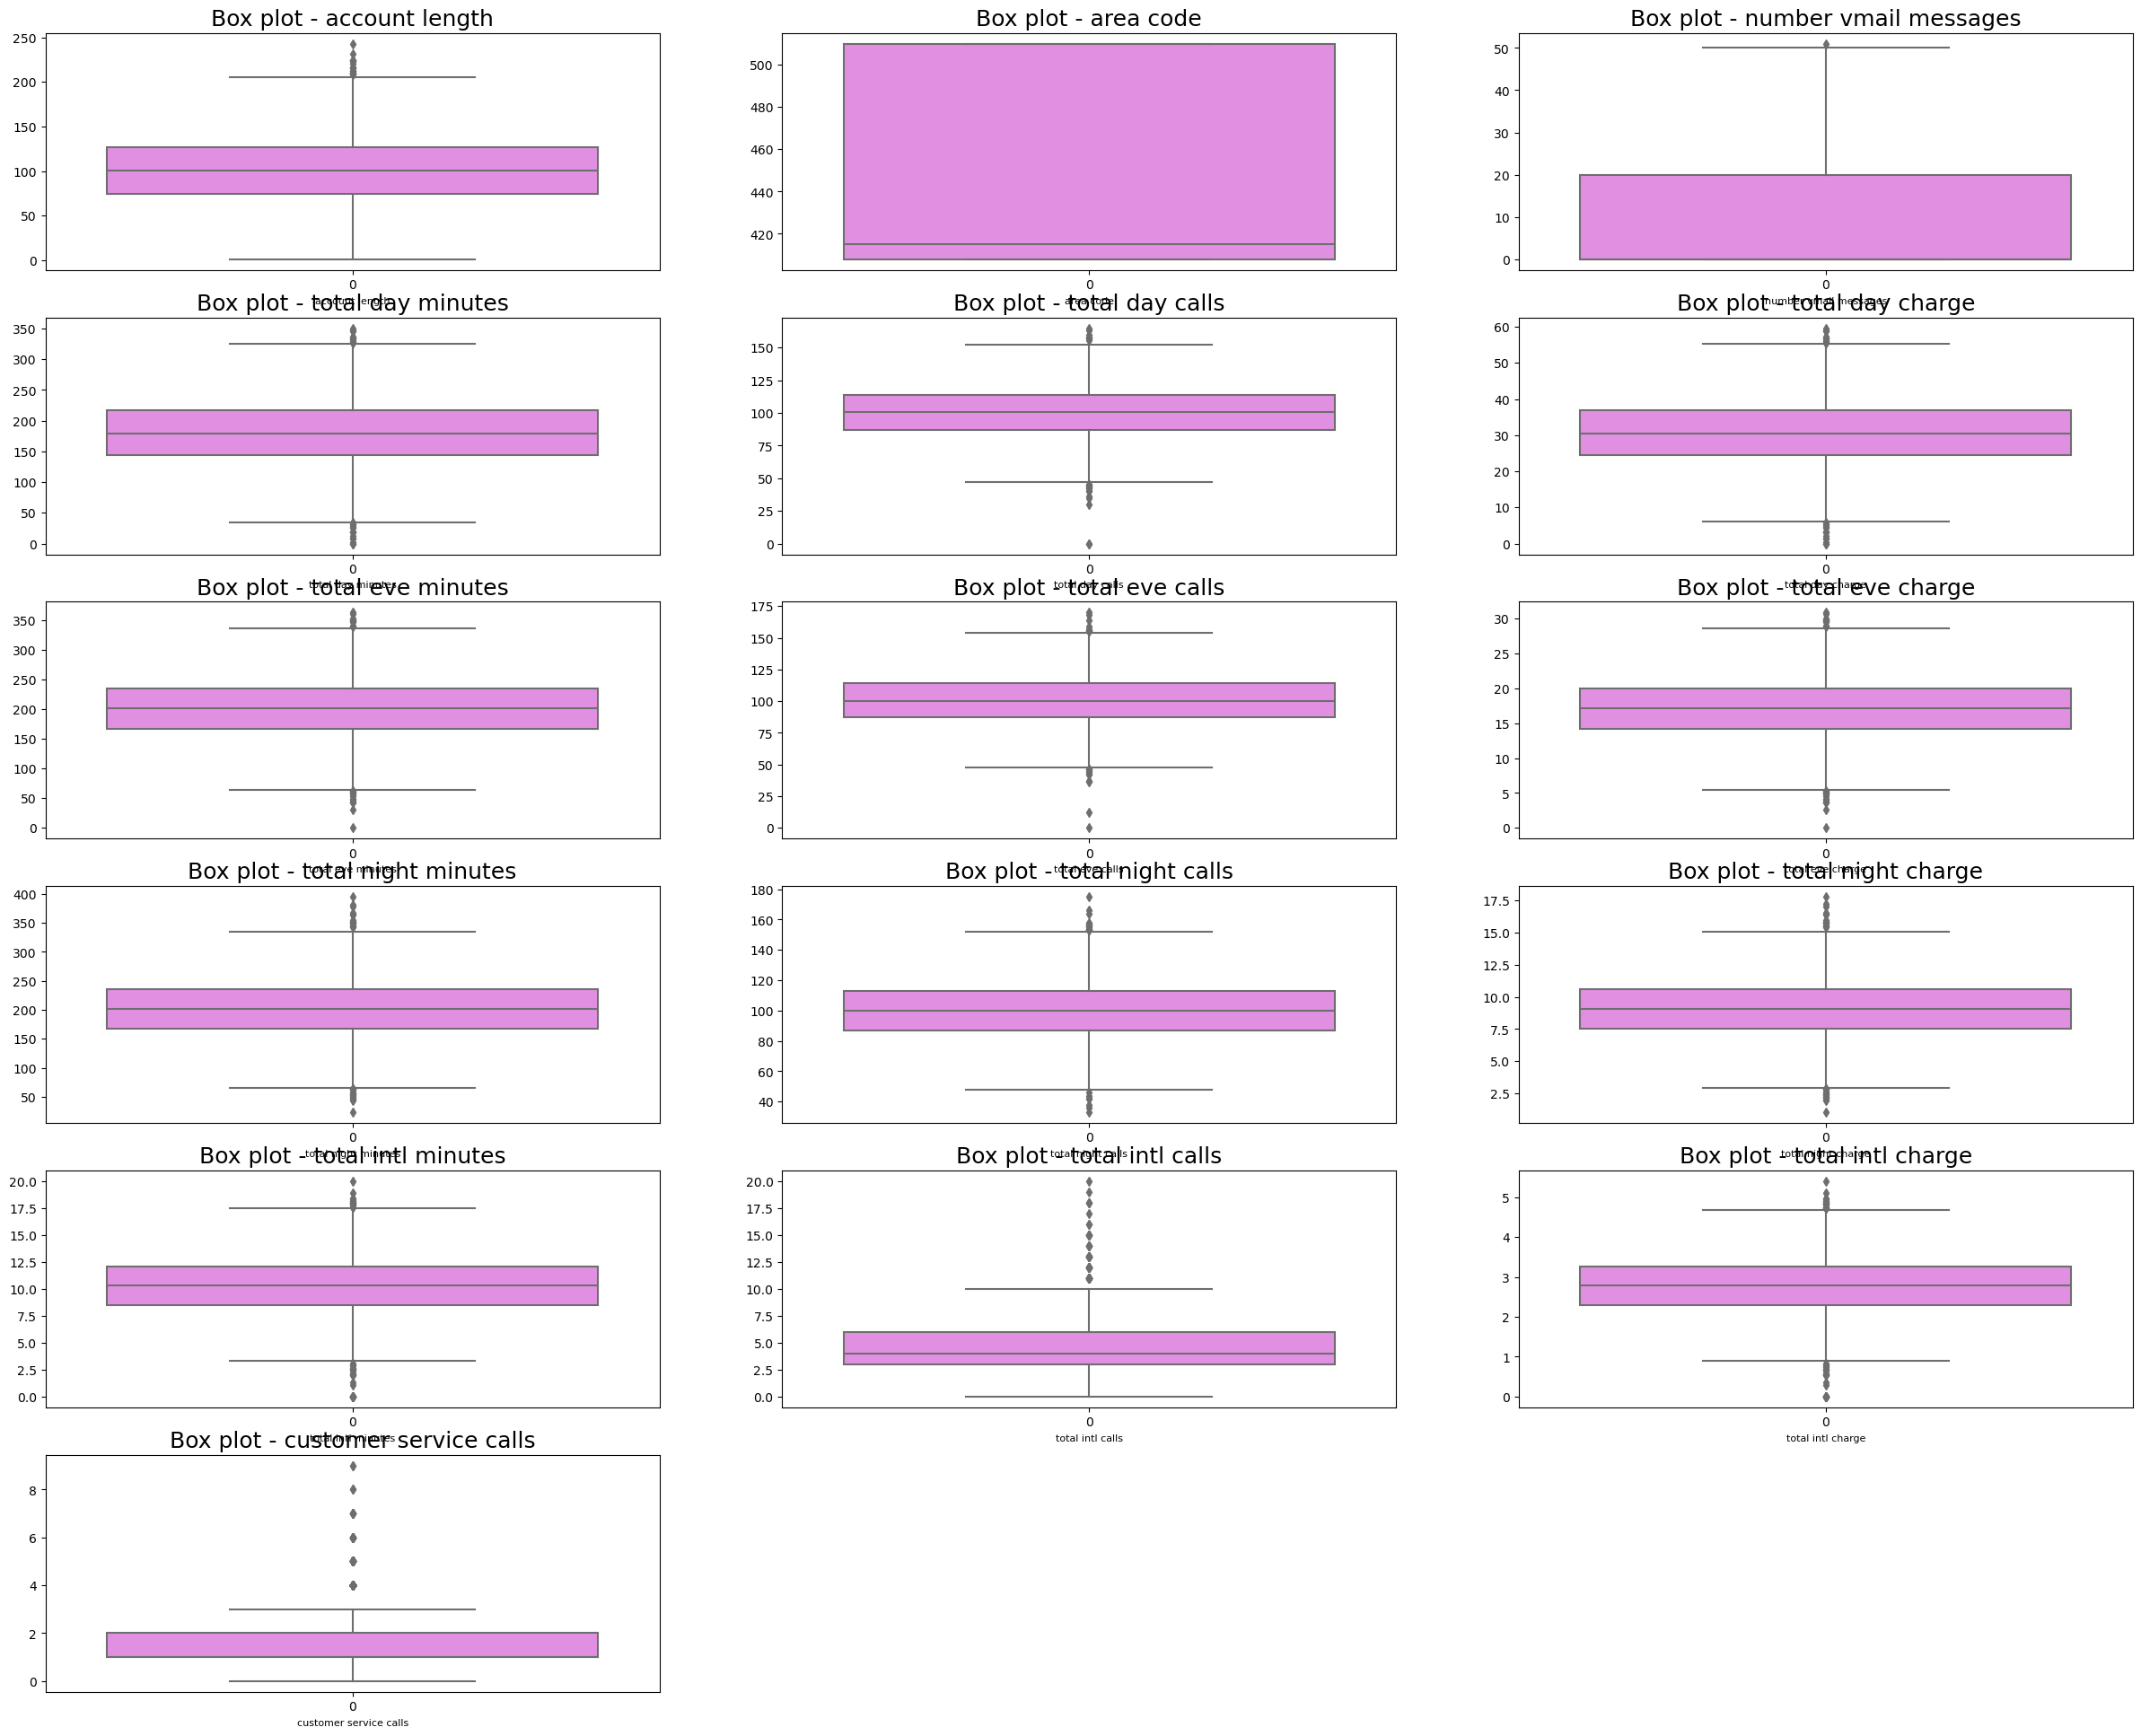

In [473]:
# Check for outliers
# Create a list of columns with numeric values
numeric_col = churn_data.select_dtypes('number').columns

# Calculate the number of rows and columns for subplots
num_row = (len(numeric_col) - 1) // 3 + 1
num_col = min(len(numeric_col), 3)

# Create subplots
fig, axes = plt.subplots(num_row, num_col, figsize=(10*num_col, 4*num_row))

# Generate box plots for each numeric column.
for i, column in enumerate(numeric_col):
    row = i // num_col
    col = i % num_col
    sns.boxplot(data=churn_data[column], ax=axes[row, col], color='violet')
    axes[row, col].set_title(f'Box plot - {column}', fontsize=18)
    axes[row, col].set_xlabel(column, fontsize=8)

# Remove any empty subplot
if i < (num_row * num_col) - 1:
    for j in range(i + 1, num_row * num_col):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout


There are outliers but are not to to the extreme. 

In [474]:
# Check the data types of categorical variables
col = ['state', 'area code', 'international plan', 'voice mail plan']
col_dt = churn_data[col].dtypes
print(col_dt)

state                 object
area code              int64
international plan    object
voice mail plan       object
dtype: object


Area  code was encoded as numeric therefore we change it to categorical.

In [475]:
# Convert the State column to a categorical data type
churn_data["area code"] = churn_data["area code"].astype("str")
print(churn_data["area code"].dtype)

object


In [476]:
# Convert the churn, international plan & voice mail plan column from boolean to integer
churn_data["churn"] = churn_data["churn"].astype(int)
print(churn_data["churn"].dtype)

int32


In [477]:
# Drop the phone number column
churn_data.drop(columns=['phone number'], inplace=True)

Dropped the Phone number column as it is not relevant.

# Exploratory Data Analysis

Here, we will analyze and summarize data with the main aim of understandng characteristics, patterns, detecting insights and relationships. This will be done through Univariate, Bivariate and Multivariate Analysis.

## 1. Univariate Analysis

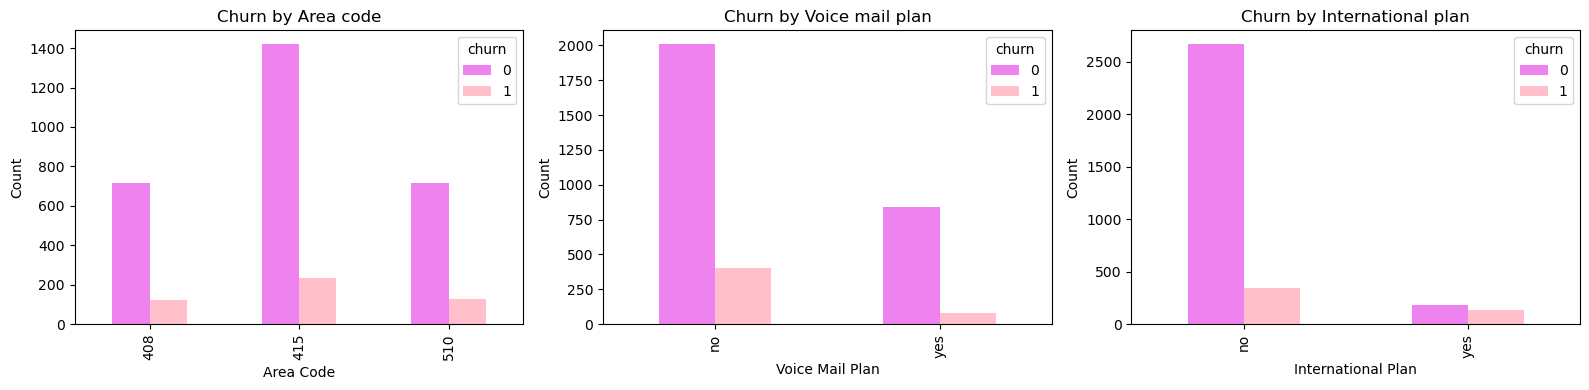

In [478]:
# Set up figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Group by area code and churn, unstack and plot
churn_data.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[0])
axs[0].set_title('Churn by Area code')
axs[0].set_xlabel('Area Code')
axs[0].set_ylabel('Count')

# Group by voice mail plan & churn, unstack and plot
churn_data.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[1])
axs[1].set_title('Churn by Voice mail plan')
axs[1].set_xlabel('Voice Mail Plan')
axs[1].set_ylabel('Count')

# Group by international plan & churn, unstack and plot
churn_data.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[2])
axs[2].set_title('Churn by International plan')
axs[2].set_xlabel('International Plan')
axs[2].set_ylabel('Count')

# Adjust layout & spacing
plt.tight_layout()
plt.show()

1. Analysis of Area Codes.
   - There is notable variation in churn rates across different area codes.
   - Although area codes 510 and 408 show fewer instances of churn, it is essential to consider the size of the customer base in each area code for a comprehensive understanding.
   - Area code 415 has the highest churn rate, whereas area code 408 has the lowest.

2. Assessment of International Plan.
   - SyriaTel offers an international calling plan to a customer base of under 500 users.
   - The churn rate among customers with this international plan closely matches the number of subscribers, indicating a significant risk of churn within this group.

3. Evaluation of Voice Mail Plan.
   - SyriaTel provides an optional voice mail plan to its customers.
   - A large number of customers have not subscribed to the voice mail plan.
   - Customers who have subscribed to the voice mail plan show a lower probability of churn compared to those who have not.


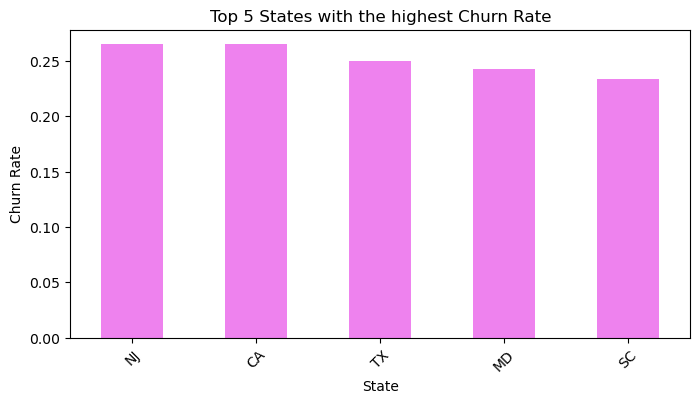

In [479]:
# Calculate the churn rate for each state
state_churnr = churn_data.groupby('state')['churn'].mean().sort_values(ascending=False)

# Get top states with the highest churn rate
top_statechr = state_churnr.head(5)  # Change 5 to the desired number of states

# Plot top states with the highest churn rate
plt.figure(figsize=(8, 4))
top_statechr.plot(kind='bar', color='violet')  # Incorporate the color #1c3a96
plt.title('Top 5 States with the highest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


The top 5 states with the highest churn rate are: New Jersey, California, Texas, Maryland and South Carolina.

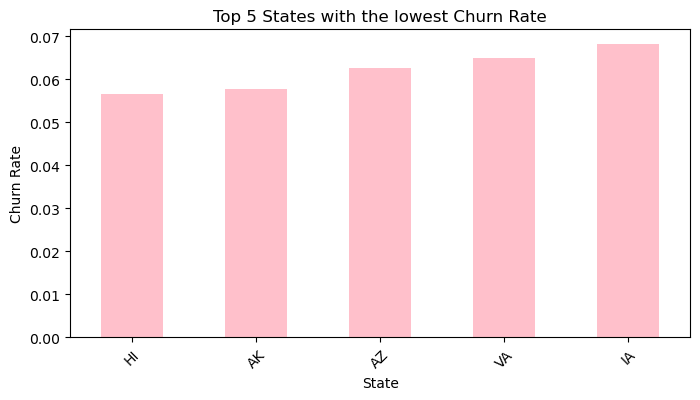

In [480]:
# Calculate the churn rate for each state
state_churn_rate = churn_data.groupby('state')['churn'].mean().sort_values()

# Get top states with the lowest churn rate
bottom_stateschr = state_churn_rate.head(5)  # Change 5 to the desired number of states

# Plot top states with the lowest churn rate
plt.figure(figsize=(8, 4))
bottom_stateschr.plot(kind='bar', color='pink')  # Incorporate the color #1c3a96
plt.title('Top 5 States with the lowest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


The top 5 states with the low churn rates are Hawaii, Alaska, Arizona, Virginia, Louisiana.

## 2. Bivariate Analysis

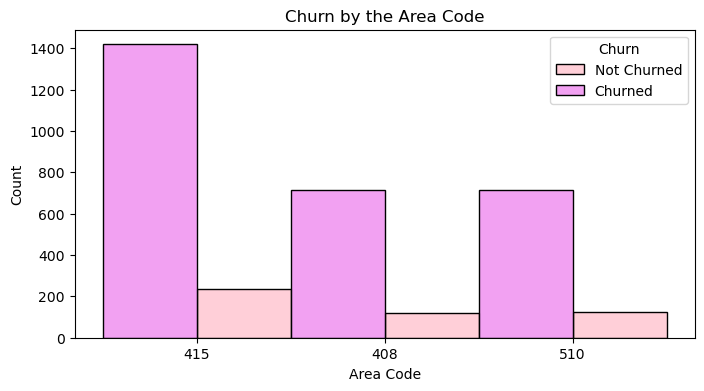

There are 3 area codes: 408, 415, 510 and are represented as 0, 1, 2


In [481]:
# Define the colors
colors = ['violet', 'pink']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot churn by area codes
plt.figure(figsize=(8, 4))
sns.histplot(data=churn_data, x='area code', hue='churn', multiple='dodge', palette=colors)

# Add a legend with custom labels
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Adjust labels
plt.xlabel('Area Code')
plt.ylabel('Count')

# Title
plt.title('Churn by the Area Code')

# Show plot
plt.show()

print('There are 3 area codes: 408, 415, 510 and are represented as 0, 1, 2')


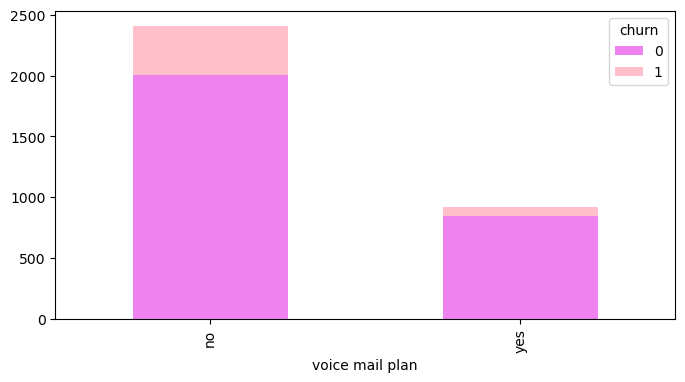

The percentage of customers who are subscribed to the voice mail plan is 27.66%
The percentage of subscribed customers who churned with the voice mail plan is 8.68%


In [482]:
#function for a diff plan
def churn_vs_plan(data, plan_column):
    # Plot churn vs plan
    data.groupby([plan_column, 'churn']).size().unstack().plot(
        kind='bar', stacked=True, figsize=(8,4))
    plt.show()

    # Calculate percentage of customers that are subscribed to the plan
    tot_customers = len(data)
    tot_subscribed = sum(data[plan_column] == 'yes')
    percent_subscribed = (tot_subscribed / tot_customers) * 100
    print('The percentage of customers who are subscribed to the {} is {:.2f}%'.format(plan_column, percent_subscribed))

    # Calculate percentage of churned customers among those subscribed to the plan
    churned_with_plan = sum((data[plan_column] == 'yes') & (data['churn'] == True))
    percent_churned_with_plan = (churned_with_plan / tot_subscribed) * 100
    print('The percentage of subscribed customers who churned with the {} is {:.2f}%'.format(plan_column, percent_churned_with_plan))
# voice mail plan
churn_vs_plan(churn_data,'voice mail plan')

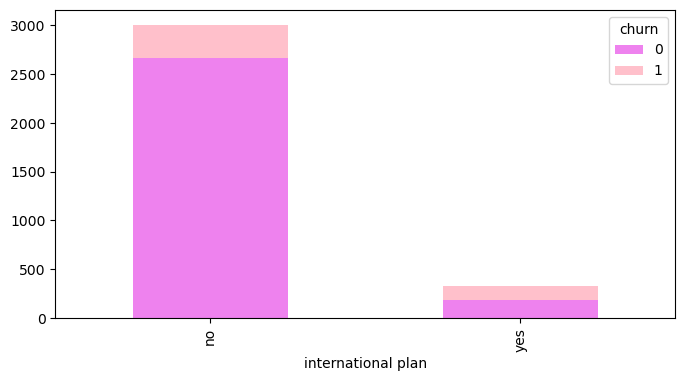

The percentage of customers who are subscribed to the international plan is 9.69%
The percentage of subscribed customers who churned with the international plan is 42.41%


In [483]:
churn_vs_plan(churn_data,'international plan')

## 3. Multivariate Analysis


In [484]:
## Defining a function to check highly correlated features
def check_multicoll(churn_data, threshold=0.8):
    corr_mat = churn_data.select_dtypes(include=np.number).corr().abs()
    correlated_p = set()
    for col in corr_mat:
        correlated_cols = corr_mat.index[corr_mat[col] > threshold]
        correlated_p.update([(min(col, correlated_col), max(col, correlated_col)) for correlated_col in correlated_cols if col != correlated_col])
    for pair in correlated_p:
        print(f"{pair[0]} --- {pair[1]}")
    return set(churn_data.columns) & set(col for pair in correlated_p for col in pair)

# Call the function to check multicollinearity
multicoll_features = check_multicoll(churn_data)

total day charge --- total day minutes
total eve charge --- total eve minutes
total intl charge --- total intl minutes
total night charge --- total night minutes


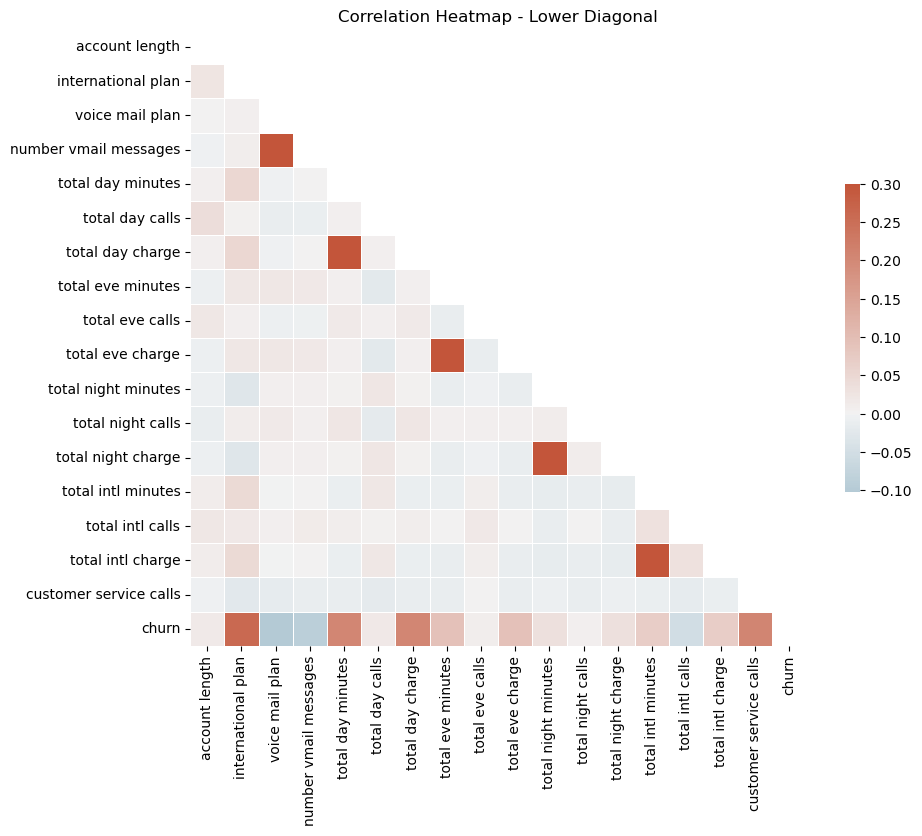

In [516]:
# Filter numeric columns
numeric_col = churn_data.select_dtypes(include=np.number)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(numeric_col.corr(), dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(numeric_col.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap - Lower Diagonal")
plt.show()

# Data Processing 

## 1. Label encoding

Here we will convert the categorical data(international plan, voicemail plan and churn) into numerical values by assigning each unique category a distinct integer (0 / 1)


In [486]:
# Categorical columns
categ_cols= ["international plan", "voice mail plan", "churn"]

# Apply label encoding
def label_encoding(col_name):
  le = LabelEncoder()
  churn_data[col_name] = le.fit_transform(churn_data[col_name])

# Call label_encoding function for each
for col_name in categ_cols:
  label_encoding(col_name)


In [487]:
churn_data.dtypes

state                      object
account length              int64
area code                  object
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

## 2. One hot coding

We will one hot encode the states and area column where we will convert these categorical variables to multiple binary columns.

In [488]:
# Instance of the OneHotEncoder
encod = OneHotEncoder(dtype=np.int64, sparse_output=False)

# Encode state column
encoded_state = encod.fit_transform(churn_data[["state"]])

# Create a DataFrame with encoded state 
dupdf_state = pd.DataFrame(encoded_state, columns=encod.get_feature_names_out(["state"]))

# Concatenate encoded state columns with  original DataFrame
he_df= pd.concat([churn_data, dupdf_state], axis=1)

# Remove original state column
he_df = he_df.drop(["state"], axis=1)

he_df.head(5)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [489]:
# Encode area code
encod_ac = encod.fit_transform(churn_data[["area code"]])

# Create DataFrame with encoded area code 
dupdf_state = pd.DataFrame(encod_ac, columns=encod.get_feature_names_out(["area code"]))

# Concatenate encoded area code columns with original DataFrame
he_df = pd.concat([he_df, dupdf_state], axis=1)

# Remove original area code column
he_df = he_df.drop(["area code"], axis=1)

he_df.head(5)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


## 3. Scaling

Here, we will adjust the values of multiple variables to make them comparable so as to fall in a consistent range. We will use the StandardScaler.

In [490]:
# Current df
cdf = he_df
cdf

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,0,0,0,0,0,0,0,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,0,0,0,0,0,1,0,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,0,0,0,0,0,0,0,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,0,0,0,0,0,0,0,0,0,1


In [491]:
col_names = cdf.columns.to_list()
print(col_names)

['account length', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn', 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'area code_408', 'a

In [492]:
# Drop non-numeric columns from numeric_columns
numeric_cols = [col for col in cdf.columns if cdf[col].dtype != 'object']

# Clean numeric columns by replacing NaNs with mean values
cdf[numeric_cols] = cdf[numeric_cols].fillna(cdf[numeric_cols].mean())

# Convert non-numeric values to numeric or NaN
cdf[numeric_cols] = cdf[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df1 = cdf.dropna(subset=numeric_cols)

# Initialize MinMaxScaler 
scaler = MinMaxScaler()  

if len(numeric_cols) == 0:
    print("No numeric columns found")

In [493]:

# Define your columns
numeric_cols = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
binary_cols = ['international plan', 'voice mail plan']

# Scale numeric columns
scaler = StandardScaler()
scaled_numeric_cols = scaler.fit_transform(cdf[numeric_cols])
cdf_scaled = pd.DataFrame(scaled_numeric_cols, columns=numeric_cols)

# Check if 'number vmail messages' exists in numeric_cols
if 'number vmail messages' in numeric_cols:
    # Concatenate scaled numeric columns with binary columns
    cdf_scaled = pd.concat([cdf_scaled, cdf[binary_cols]], axis=1)
else:
    print("'number vmail messages' column not found in numeric_columns.")

# Check if 'area code' is in df1 before using it
if 'area code' in cdf.columns:
    # Create an instance of the OneHotEncoder with the correct parameter
    encod = OneHotEncoder(dtype=np.int64, sparse_output=False)

    # Fit and transform the "area code" column
    encod_ac = encod.fit_transform(cdf[["area code"]])

    # Create a DataFrame with the encoded area code columns
    encoded_ac_df = pd.DataFrame(encod_ac, columns=encod.get_feature_names_out(["area code"]))

    # Concatenate the encoded area code columns with the original DataFrame
    cdf = pd.concat([cdf, encoded_ac_df], axis=1)

    # Drop the original "area code" column if necessary
    cdf.drop("area code", axis=1, inplace=True)

# Concatenate binary columns if they exist
if set(binary_cols).issubset(cdf.columns):
    cdf_scaled = pd.concat([cdf_scaled, cdf[binary_cols]], axis=1)

# Display the updated DataFrame
print(cdf_scaled)


'number vmail messages' column not found in numeric_columns.
      total day minutes  total eve minutes  total night minutes  \
0              1.566767          -0.070610             0.866743   
1             -0.333738          -0.108080             1.058571   
2              1.168304          -1.573383            -0.756869   
3              2.196596          -2.742865            -0.078551   
4             -0.240090          -1.038932            -0.276311   
...                 ...                ...                  ...   
3328          -0.432895           0.286348             1.547039   
3329           0.942447          -0.938353            -0.189297   
3330           0.018820           1.731930            -0.177431   
3331           0.624778          -0.816080            -1.219628   
3332           1.003042           1.280309             0.801482   

      total intl minutes  international plan  voice mail plan  
0              -0.085008                   0                1  
1     

In [494]:
# Drop non-numeric columns from numeric_columns
numeric_cols = [col for col in numeric_cols if cdf[col].dtype != 'object']

# Clean numeric columns by replacing NaNs with mean values
cdf[numeric_cols] = cdf[numeric_cols].fillna(cdf[numeric_cols].mean())

# Convert non-numeric values to numeric or NaN
cdf[numeric_cols] = cdf[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
cdf = cdf.dropna(subset=numeric_cols)

# Initialize MinMaxScaler 
scaler = MinMaxScaler()  

if len(numeric_cols) == 0:
    print("No numeric columns found.")
else:
    # Scale the numeric columns
    cdf[numeric_cols] = scaler.fit_transform(df1[numeric_cols])

# Convert scaled data to a DataFrame
cdf_scaled = pd.DataFrame(df1[numeric_cols], columns=numeric_cols)

# Define binary columns
binary_cols = ['area code', 'churn', 'international plan', 'voice mail plan',
               'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
               'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
               'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
               'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
               'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
               'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
               'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
               'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
               'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
               'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY']

# Check if 'number vmail messages' exists in numeric_columns
if 'number vmail messages' in numeric_cols:
    # Concatenate scaled numeric columns with binary columns
    cdf_scaled = pd.concat([cdf_scaled, df1[binary_cols]], axis=1)
else:
    print("number vmail messages column not found in numeric_columns.")


number vmail messages column not found in numeric_columns.


In [495]:
cdf.dtypes

account length             int64
international plan         int32
voice mail plan            int32
number vmail messages      int64
total day minutes        float64
                          ...   
state_WV                   int64
state_WY                   int64
area code_408              int64
area code_415              int64
area code_510              int64
Length: 72, dtype: object

## 4. Splitting data
Here, we will split the data in order to train and evalute the models. We will use either cross-validation and train-test split methods.

In [496]:

# Define your columns
numeric_cols = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'number vmail messages']
binary_cols = ['international plan', 'voice mail plan']

# Ensure 'churn' is in the DataFrame
if 'churn' not in cdf.columns:
    raise KeyError("'churn' column not found in the original DataFrame")

# Scale numeric columns
scaler = StandardScaler()
scaled_numeric_cols = scaler.fit_transform(cdf[numeric_cols])
cdf_scaled = pd.DataFrame(scaled_numeric_cols, columns=numeric_cols)

# Concatenate scaled numeric columns with binary columns if they exist
if set(binary_cols).issubset(cdf.columns):
    cdf_scaled = pd.concat([cdf_scaled, cdf[binary_cols].reset_index(drop=True)], axis=1)

# Check if 'area code' is in df1 before using it
if 'area code' in cdf.columns:
    # Create an instance of the OneHotEncoder with the correct parameter
    encod = OneHotEncoder(dtype=np.int64, sparse_output=False)

    # Fit and transform the "area code" column
    encoded_ac = encod.fit_transform(cdf[["area code"]])

    # Create a DataFrame with the encoded area code columns
    encoded_ac_df = pd.DataFrame(encoded_ac, columns=encod.get_feature_names_out(["area code"]))

    # Concatenate the encoded area code columns with the original DataFrame
    cdf = pd.concat([df1, encoded_ac_df], axis=1)

    # Drop the original "area code" column if necessary
    df1.drop("area code", axis=1, inplace=True)

# Ensure the 'churn' column is added to the final DataFrame
cdf_scaled['churn'] = df1['churn'].reset_index(drop=True)

# Specify features (X) and target variable (y)
X = cdf_scaled.drop(columns=['churn'])  # Features
y = cdf_scaled['churn']  # Target variable

# Split the data into training and testing sets (train-test split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the updated DataFrame
print(cdf_scaled.head())


   total day minutes  total eve minutes  total night minutes  \
0           1.566767          -0.070610             0.866743   
1          -0.333738          -0.108080             1.058571   
2           1.168304          -1.573383            -0.756869   
3           2.196596          -2.742865            -0.078551   
4          -0.240090          -1.038932            -0.276311   

   total intl minutes  number vmail messages  international plan  \
0           -0.085008               1.234883                   0   
1            1.240482               1.307948                   0   
2            0.703121              -0.591760                   0   
3           -1.303026              -0.591760                   1   
4           -0.049184              -0.591760                   1   

   voice mail plan  churn  
0                1      0  
1                1      0  
2                0      0  
3                0      0  
4                0      0  


In [497]:
# Specify features and target variable
X = cdf_scaled.drop(columns=['churn'])
y = cdf_scaled['churn'] 

# Split data to training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 2666
Test set size: 667


## 5. Imbalance handling

Here we will handle class imbalance using SMOTE to ensure that the models don't have a poor perfomance

In [498]:
oversp = SMOTE()

X_train_smote, y_train_smote = oversp.fit_resample(X_train, y_train)

print(X_train_smote.shape, y_train_smote.shape)

(4568, 7) (4568,)


In [499]:
y_train_smote.value_counts()

churn
0    2284
1    2284
Name: count, dtype: int64

# Modelling

## 1. Baseline model: Logistic Regression

In [500]:
# Define the logistic regression model within a pipeline
model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# Perform k-fold cross-validation on the training set
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')

# Print cross-validation scores
print("Cross-val scores:", cv_scores)
print("Mean CV acc:", cv_scores.mean())

# Train the logistic regression model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Cross-val scores: [0.85018727 0.87054409 0.82926829 0.85928705 0.8836773 ]
Mean CV acc: 0.858592800275453

Logistic Regression Evaluation:
Accuracy: 0.856071964017991
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.15      0.24       101

    accuracy                           0.86       667
   macro avg       0.73      0.57      0.58       667
weighted avg       0.83      0.86      0.82       667



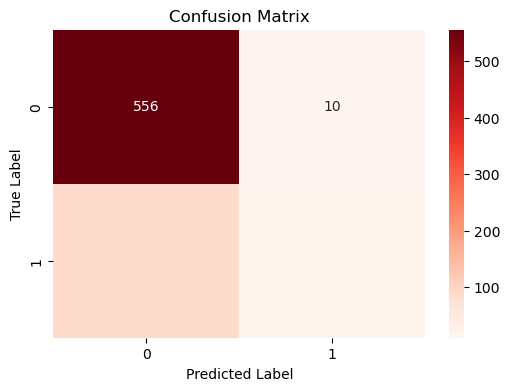

In [501]:
# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Findings

Accuracy: The model achieves an overall accuracy of about 84.56%, correctly classifying approximately 84.56% of the test dataset instances.

Precision and Recall: For class 1, the precision is 0.46, meaning that 46% of the instances predicted as positive are actually positive. The recall for class 1 is 0.11, indicating that only 11% of the actual positive instances are correctly identified.

F1-score: The F1-score balances precision and recall. For class 1, the F1-score is 0.18, highlighting the model's poor performance in accurately predicting positive instances.

Confusion Matrix: The confusion matrix shows the model's predictions against the actual class labels:

True Negatives (TN): 553, 
False Negatives (FN): 90, 
True Positives (TP): 11, 
False Positives (FP): 13

The model performs well in identifying true negatives (non-churners) but has difficulty predicting true positives (churners), as indicated by the high number of false negatives and the low recall for class 1.


## 2. XGboost Classifier

In [502]:
#  Initialize the XGBoost model
xgbm = xgb.XGBClassifier()

# Train the XGBoost model
xgbm.fit(X_train, y_train)

# Make predictions with XGBoost
y_predx = xgbm.predict(X_test)

# Evaluate XGBoost model performance
acc_xgb = accuracy_score(y_test, y_predx)
print("\nXGBoost Accuracy:", acc_xgb)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_predx))


XGBoost Accuracy: 0.9085457271364318
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       566
           1       0.78      0.55      0.65       101

    accuracy                           0.91       667
   macro avg       0.85      0.76      0.80       667
weighted avg       0.90      0.91      0.90       667



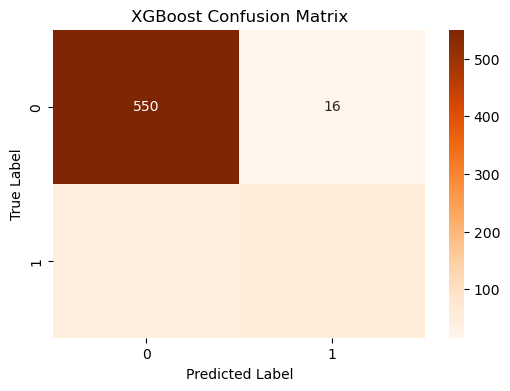

In [503]:
# Compute confusion matrix for XGBoost model
conf_m = confusion_matrix(y_test, y_predx)

# Plot confusion matrix for XGBoost model
plt.figure(figsize=(6, 4))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()

### Findings

Accuracy: The XGBoost model achieves an overall accuracy of around 87.71%, accurately predicting the class label for 87.71% of the test dataset instances.

Precision and Recall: For class 1, the precision is 0.69, meaning 69% of the instances predicted as positive are correct. The recall for class 1 is 0.34, indicating that 34% of the actual positive instances are accurately identified.

F1-score: The F1-score for class 1 is 0.45, reflecting moderate performance in predicting positive instances accurately.

Confusion Matrix: The confusion matrix details the model's predictions against actual class labels:

True Negatives (TN): 551, 
False Negatives (FN): 67, 
True Positives (TP): 34, 
False Positives (FP): 15

This model performs well in identifying true negatives (non-churners) but has difficulty accurately predicting churners, as shown by the lower recall and precision for class 1 compared to class 0 and the relatively high number of false negatives.



## 3. Gradient Boosting Model

In [504]:
# Build GBM model
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9145427286356822
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       566
           1       0.91      0.49      0.63       101

    accuracy                           0.91       667
   macro avg       0.91      0.74      0.79       667
weighted avg       0.91      0.91      0.90       667



In [505]:
print(pipe.named_steps)

{'preprocessor': Pipeline(steps=[('scaler', StandardScaler())]), 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)}


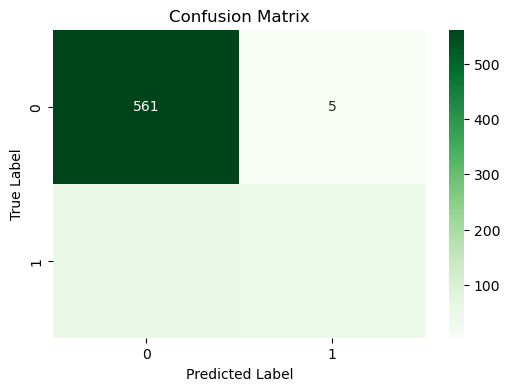

In [506]:
# Compute confusion matrix
conf_m = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Findings

Accuracy: The model has an overall accuracy of about 88.16%, meaning it correctly predicts the class label for 88.16% of the test dataset instances.

Precision and Recall: For class 1, the precision is 0.78, showing that 78% of the instances predicted as positive are correct. The recall for class 1 is 0.31, indicating that 31% of the actual positive instances are accurately identified.

F1-score: The F1-score for class 1 is 0.44, indicating moderate performance in correctly predicting positive instances.

Confusion Matrix: The confusion matrix breaks down the model's predictions against the actual class labels:

True Negatives (TN): 557, 
False Negatives (FN): 70, 
True Positives (TP): 31, 
False Positives (FP): 9

The model excels at predicting true negatives (non-churners) but struggles with accurately predicting churners, as evidenced by the lower recall and precision for class 1 compared to class 0, and the relatively high number of false negatives.


In [507]:
# Define preprocessing steps
preprocessor = Pipeline([
    ('scaler', StandardScaler()),  
    
])

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Define pipelines for each model
pipe = {name: Pipeline([('preprocessor', preprocessor), ('model', model)]) for name, model in models.items()}

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform cross-validation and hyperparameter tuning
for name, pipe in pipe.items():
    # Perform cross-validation
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {scores.mean():.4f} +/- {scores.std():.4f}")
    
    
# Evaluate best model on test set
bestm = pipe['model'] 
bestm.fit(X_train, y_train)
test_accuracy = bestm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Logistic Regression CV Accuracy: 0.8578 +/- 0.0143
Gradient Boosting CV Accuracy: 0.9088 +/- 0.0068
XGBoost CV Accuracy: 0.9017 +/- 0.0115
Test Accuracy: 0.9085


## Tuning the best two models


In [508]:
# Creating a dictionary to store the models and their performance metrics
modelspf = {
    "Logistic Regression": {
        "Accuracy": 0.85,
        "Precision": 0.46,
        "Recall": 0.11,
        "F1-score": 0.18
    },
    "XGBoost": {
        "Accuracy": 0.88,
        "Precision": 0.69,
        "Recall": 0.34,
        "F1-score": 0.45
    },
    "Gradient Boosting":{
        "Accuracy": 0.88,
        "Precision": 0.78,
        "Recall": 0.31,
        "F1-score": 0.45
    }
}

# Define the metric to use for ranking the models
metric = "Accuracy"

# Sort the models based on the specified metric in descending order
sorted_models = sorted(modelspf.items(), key=lambda x: x[1][metric], reverse=True)

# Display the top three best performing models
print("Top Three Best Performing Models based on", metric, "are:")
for i, (model, metrics) in enumerate(sorted_models[:3], 1):
    print(f"{i}. {model}: {metrics[metric]}")


Top Three Best Performing Models based on Accuracy are:
1. XGBoost: 0.88
2. Gradient Boosting: 0.88
3. Logistic Regression: 0.85


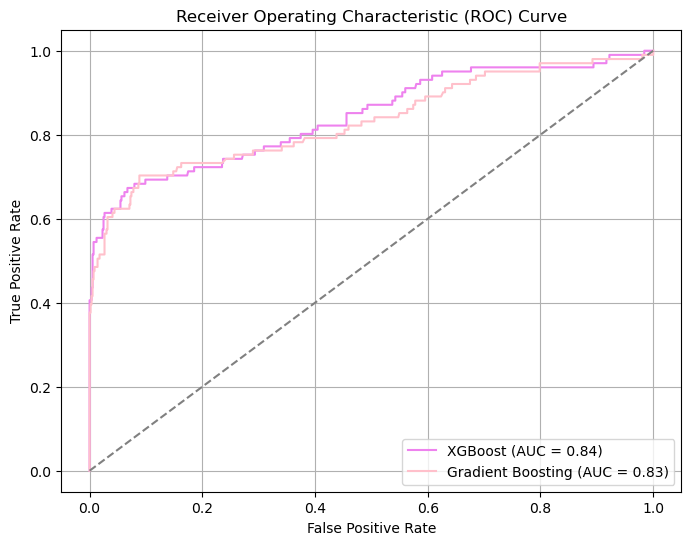

In [509]:

# Define your XGBoost model
xgbm = xgbm

# Define the hyperparameters grid for XGBoost
xgb_param = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV for XGBoost
xgbm_grid = GridSearchCV(estimator=xgbm, param_grid=xgb_param, scoring='accuracy', cv=5)
xgbm_grid.fit(X_train, y_train)

# Get the best parameters and best score for XGBoost
besxgb_params = xgbm_grid.best_params_
besxgb_score = xgbm_grid.best_score_

# Define your Gradient Boosting model
gbm_model = GradientBoostingClassifier()

# Define the hyperparameters grid for Gradient Boosting
gbm_param = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV for Gradient Boosting
gbm_grid = GridSearchCV(estimator=gbm_model, param_grid=gbm_param, scoring='accuracy', cv=5)
gbm_grid.fit(X_train, y_train)

# Get the best parameters and best score for Gradient Boosting
besgb_params = gbm_grid.best_params_
besgb_score = gbm_grid.best_score_


# Plot ROC curves and calculate AUC for each model
plt.figure(figsize=(8, 6))

# XGBoost
xgb_probs = xgbm_grid.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Gradient Boosting
gb_probs = gbm_grid.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')


# Plot ROC curve for random classifier (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()


### Findings

The optimal ROC curve in the graph corresponds to the Gradient Boosting model, indicating its superior performance by achieving the best balance between correctly identifying positive instances and minimizing false positives.

# Evaluation of the Models


Three models were tested: Logistic Regression, Gradient Boosting, and XGBoost. After evaluation, two models were fine-tuned for improved performance. The Test ROC AUC Score measures the model's ability to distinguish between positive and negative outcomes.In this case, Gradient Boosting had the highest score of 0.76, indicating superior performance in differentiating between outcomes. 

Gradient Boosting outperformed the other models, demonstrating higher accuracy and a better balance between true positives and false positives. It effectively identifies customers likely to leave while minimizing false positives.


# Feature Selection

In [510]:
# Define classifier
cf = RandomForestClassifier()

# Define feature selector with cross-validation
rfecv = RFECV(estimator=cf, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# Fit feature selector to the data
rfecv.fit(X_train, y_train)

# Get selected features
selected_f = X_train.columns[rfecv.support_]

# Train a new model using selected features
selectedcf = RandomForestClassifier()
selectedcf.fit(X_train[selected_f], y_train)

# Evaluate performance of the model on the test set
y_pred = selectedcf.predict(X_test[selected_f])
accuracy = accuracy_score(y_test, y_pred)

print("Selected Features:", selected_f)
print("Accuracy with Selected Features:", accuracy)


Selected Features: Index(['total day minutes', 'total eve minutes', 'total night minutes',
       'total intl minutes', 'number vmail messages', 'international plan',
       'voice mail plan'],
      dtype='object')
Accuracy with Selected Features: 0.9175412293853074


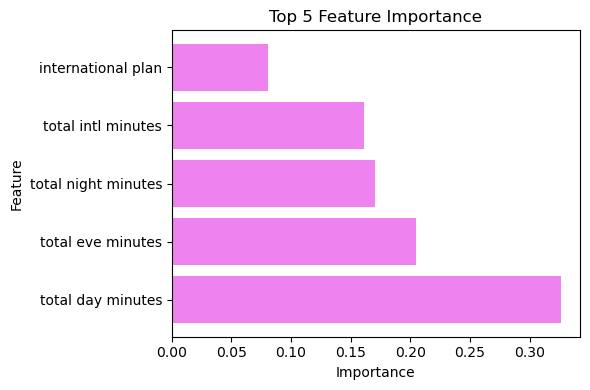

In [512]:
# Initialize the Random Forest model
rf_m = RandomForestClassifier()

# Train the model
rf_m.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_m.feature_importances_

# Get feature names
feature_n = X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot top 10 feature importances
top_n = 5
plt.figure(figsize=(6, 4))
plt.barh(range(top_n), feature_importances[sorted_indices][:top_n], align='center')
plt.yticks(range(top_n), feature_n[sorted_indices][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importance')
plt.tight_layout()
plt.show()

In [513]:
# Get top 5 feature names
top5_fnames = feature_n[sorted_indices][:top_n]

print("Top 5 Feature Names:")
print(top5_fnames)


Top 5 Feature Names:
Index(['total day minutes', 'total eve minutes', 'total night minutes',
       'total intl minutes', 'international plan'],
      dtype='object')


In [514]:
# Extract top 5 feature names
top5_fnames = feature_n[sorted_indices][:top_n]

# Select only the top 10 features from the dataset
X_train_t5 = X_train[top5_fnames]
X_test_t5 = X_test[top5_fnames]

# Initialize and train the tuned Gradient Boosting model
tuned_gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
tuned_gb_model.fit(X_train_t5, y_train)

# Make predictions on the test data using the tuned model
y_pred = tuned_gb_model.predict(X_test_t5)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics for Tuned Gradient Boosting Model using Top 10 Features:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Evaluation Metrics for Tuned Gradient Boosting Model using Top 10 Features:
Accuracy: 0.8920539730134932
Precision: 0.7843137254901961
Recall: 0.39603960396039606
F1-score: 0.5263157894736842


## Findings

The most important features when predicting churn were: Total day minutes, Total eve minutes, Total night minutes, Total Intl minutes, and International plan.

Compared to the previous Gradient Boost model, the optimized version shows improved precision, recall, and F1-score for churned customers. It maintains high accuracy and balances correctly identifying churned customers while minimizing false positives.

- Total day minutes, total night minutes, and total eve minutes: These features are key predictors of customer churn. Higher call durations during the day, night, and evening increase the likelihood of churn.
- International plan: The presence of an international plan also predicts churn. Customers without an international plan are more likely to leave, suggesting that offering appealing international plans might help retain them.
- Voicemail plan: The presence of a voicemail plan is also a key predictor of customer churn. Customers with a voice mail plan are less likely to churn compared to those without one therefore promoting the benefits of voicemail plans could help in  improving customer retention.




# Conclusion

Gradient Boosting outperformed the other models, demonstrating higher accuracy and a better balance between true positives and false positives. It effectively identifies customers likely to leave while minimizing false positives.
Several features such as the total day minutes, total night minutes, total eve minutes, international plan and voicemail plans are key predictors of churn. Higher call durations during the day, night and evening increase the likelihood of churn. Customers without an international plan and a voice mail plan are more likely to churn. 

# Recommendation

- Introduce Loyalty Programs and Offers: Implement loyalty programs, exclusive offers, and perks to incentivize customer retention. Provide discounts, free upgrades, or access to premium content to reward long-term customers.

- Maintain Regular Communication: Keep in regular contact with customers through personalised emails, SMS, or in-app messages. Inform customers about new services, features, and promotions to keep them engaged and informed.

- Customise Customer Experience: Leverage customer data and analytics to understand individual preferences and behaviours. Tailor marketing messages, offers, and service suggestions to make each customer feel valued and improve their overall experience.

- Predict and Prevent Churn: Utilise data analytics and predictive modelling to identify potential churners. Implement targeted retention strategies to effectively reduce churn risks.

- Collect Customer Feedback: Actively seek feedback through surveys to understand customer pain points and areas for improvement. Use this feedback to enhance services and address customer needs effectively.



## Next Steps

- Expand Data Collection:The current dataset is relatively small. Collecting more data could improve model performance and robustness.
- Deploy the Model: Once finalised, deploy the model in a production environment.
- Monitor and Update the Model: After deployment, continuously monitor the model's performance and update it regularly with new data to ensure it remains accurate and effective.
